In [1]:
# the default additions to my notebook
import pandas as pd
import numpy as np

# custom files used to import functions created by me and tailored for the telco dataset
import acquire
import prepare
import explore

# matplotlib and seaborn are added for visuals
import matplotlib.pyplot as plt
import seaborn as sns

# stats is added for any computational work that needs to be done
from scipy import stats

# utilized for creating models and visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# utilized for metrics on my models
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# pulling telco data set from the Codeup database
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
# cleaning up telco dataset and removing features that either don't have a relationship with churn rate or have
# very little influence on the churn rate in terms of predicting when churn will happen or not.
telco = prepare.prep_telco(telco)
telco.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_service,has_paperless_billing,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,1,1,1,1,1,...,1,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,0,1,0,1,1,...,0,1,1,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,1,1,0,1,1,...,1,1,0,0,0,1,0,0,0,1


In [4]:
# Separating my overall telco dataset into my train dataset which I will use to build my models, my validate dataset
# which will check to make sure i didn't overfit my models, and my test dataset which will test my best model
train, validate, test = prepare.my_train_test_split(telco, 'has_churned')

In [5]:
# checking to ensure my datasets split according to my specifications
train.shape, validate.shape, test.shape

((4225, 25), (1409, 25), (1409, 25))

In [6]:
# separating my columns/features into numerical data types and categorical data types to ensure I can best explore
# data types appropriately 
num_type_list, cat_type_list = explore.dtypes_to_list(train)

In [7]:
# my continuous data types 
num_type_list

['monthly_charges', 'total_charges']

In [8]:
# my discrete data types
# removed my target from the list for exploration purposes
cat_type_list.remove('has_churned')
cat_type_list

['customer_id',
 'senior_citizen',
 'tenure',
 'is_female',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_paperless_billing',
 'multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

customer_id
8319-QBEHW    1
3677-TNKIO    1
6837-HAEVO    1
7649-PHJVR    1
7416-CKTEP    1
             ..
7495-OOKFY    1
4644-PIZRT    1
4513-CXYIX    1
9828-QHFBK    1
5081-NWSUP    1
Name: customer_id, Length: 4225, dtype: int64
8319-QBEHW    0.023669
3677-TNKIO    0.023669
6837-HAEVO    0.023669
7649-PHJVR    0.023669
7416-CKTEP    0.023669
                ...   
7495-OOKFY    0.023669
4644-PIZRT    0.023669
4513-CXYIX    0.023669
9828-QHFBK    0.023669
5081-NWSUP    0.023669
Name: customer_id, Length: 4225, dtype: float64


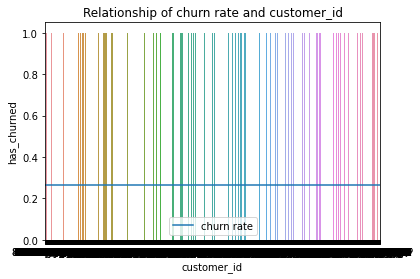

We fail to reject the null hypothesis that customer_id and churn rate are independent
There appears to be no relationship between churn rate and customer_id

senior_citizen
0    3541
1     684
Name: senior_citizen, dtype: int64
0    83.810651
1    16.189349
Name: senior_citizen, dtype: float64


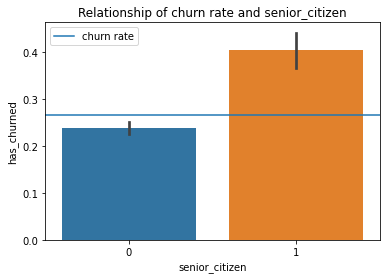

We reject the null hypothesis that senior_citizen and churn rate are independent
There is a relationship between churn rate and senior_citizen

tenure
1     358
72    217
2     143
3     112
71    106
     ... 
43     32
44     31
45     31
36     30
0       9
Name: tenure, Length: 73, dtype: int64
1     8.473373
72    5.136095
2     3.384615
3     2.650888
71    2.508876
        ...   
43    0.757396
44    0.733728
45    0.733728
36    0.710059
0     0.213018
Name: tenure, Length: 73, dtype: float64


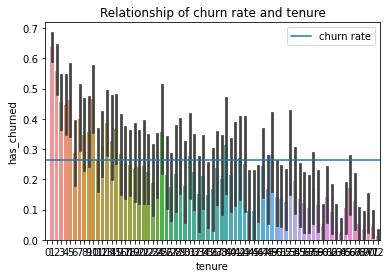

We reject the null hypothesis that tenure and churn rate are independent
There is a relationship between churn rate and tenure

is_female
0    2149
1    2076
Name: is_female, dtype: int64
0    50.863905
1    49.136095
Name: is_female, dtype: float64


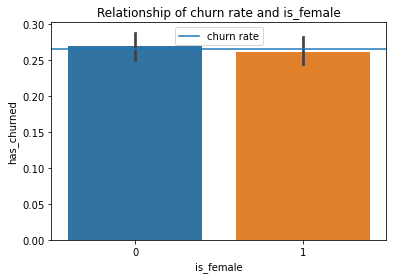

We fail to reject the null hypothesis that is_female and churn rate are independent
There appears to be no relationship between churn rate and is_female

has_partner
0    2161
1    2064
Name: has_partner, dtype: int64
0    51.147929
1    48.852071
Name: has_partner, dtype: float64


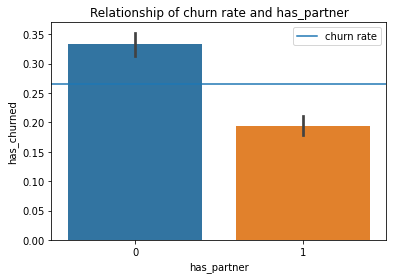

We reject the null hypothesis that has_partner and churn rate are independent
There is a relationship between churn rate and has_partner

has_dependents
0    2931
1    1294
Name: has_dependents, dtype: int64
0    69.372781
1    30.627219
Name: has_dependents, dtype: float64


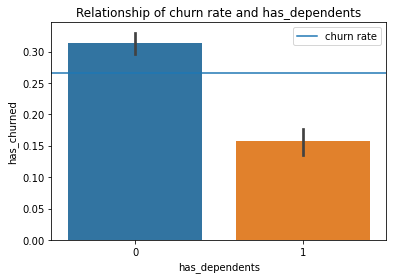

We reject the null hypothesis that has_dependents and churn rate are independent
There is a relationship between churn rate and has_dependents

has_phone_service
1    3832
0     393
Name: has_phone_service, dtype: int64
1    90.698225
0     9.301775
Name: has_phone_service, dtype: float64


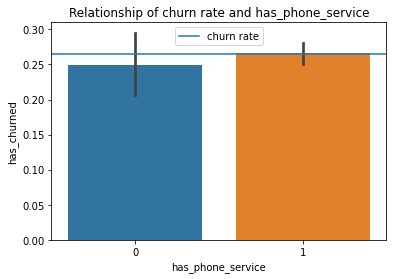

We fail to reject the null hypothesis that has_phone_service and churn rate are independent
There appears to be no relationship between churn rate and has_phone_service

has_paperless_billing
1    2509
0    1716
Name: has_paperless_billing, dtype: int64
1    59.384615
0    40.615385
Name: has_paperless_billing, dtype: float64


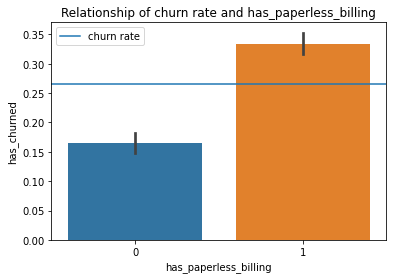

We reject the null hypothesis that has_paperless_billing and churn rate are independent
There is a relationship between churn rate and has_paperless_billing

multiple_lines_Yes
0    2418
1    1807
Name: multiple_lines_Yes, dtype: int64
0    57.230769
1    42.769231
Name: multiple_lines_Yes, dtype: float64


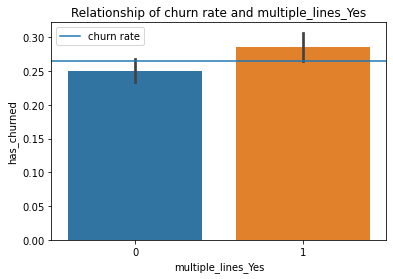

We reject the null hypothesis that multiple_lines_Yes and churn rate are independent
There is a relationship between churn rate and multiple_lines_Yes

online_security_Yes
0    2993
1    1232
Name: online_security_Yes, dtype: int64
0    70.840237
1    29.159763
Name: online_security_Yes, dtype: float64


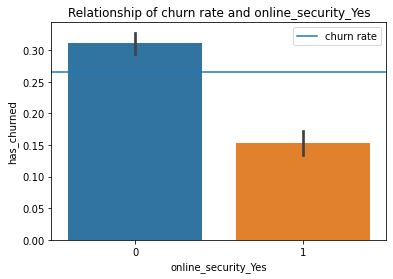

We reject the null hypothesis that online_security_Yes and churn rate are independent
There is a relationship between churn rate and online_security_Yes

online_backup_Yes
0    2746
1    1479
Name: online_backup_Yes, dtype: int64
0    64.994083
1    35.005917
Name: online_backup_Yes, dtype: float64


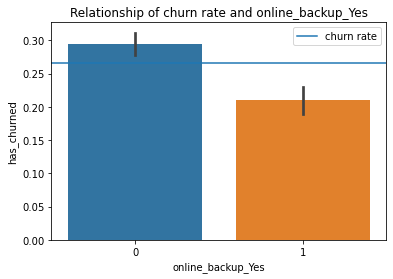

We reject the null hypothesis that online_backup_Yes and churn rate are independent
There is a relationship between churn rate and online_backup_Yes

device_protection_Yes
0    2742
1    1483
Name: device_protection_Yes, dtype: int64
0    64.899408
1    35.100592
Name: device_protection_Yes, dtype: float64


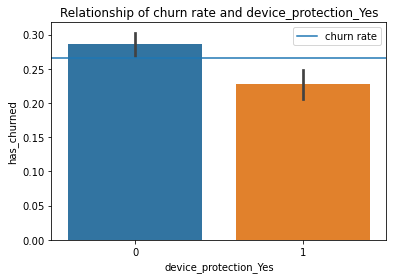

We reject the null hypothesis that device_protection_Yes and churn rate are independent
There is a relationship between churn rate and device_protection_Yes

tech_support_Yes
0    3002
1    1223
Name: tech_support_Yes, dtype: int64
0    71.053254
1    28.946746
Name: tech_support_Yes, dtype: float64


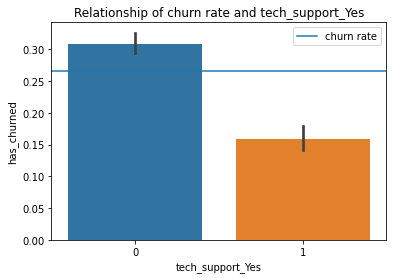

We reject the null hypothesis that tech_support_Yes and churn rate are independent
There is a relationship between churn rate and tech_support_Yes

streaming_tv_Yes
0    2568
1    1657
Name: streaming_tv_Yes, dtype: int64
0    60.781065
1    39.218935
Name: streaming_tv_Yes, dtype: float64


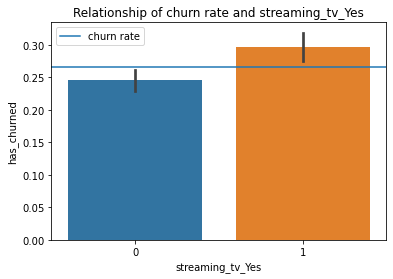

We reject the null hypothesis that streaming_tv_Yes and churn rate are independent
There is a relationship between churn rate and streaming_tv_Yes

streaming_movies_Yes
0    2554
1    1671
Name: streaming_movies_Yes, dtype: int64
0    60.449704
1    39.550296
Name: streaming_movies_Yes, dtype: float64


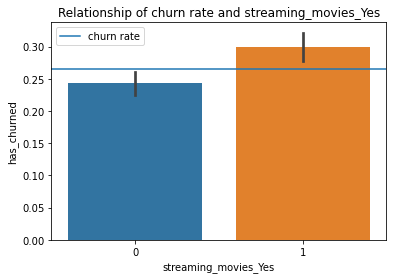

We reject the null hypothesis that streaming_movies_Yes and churn rate are independent
There is a relationship between churn rate and streaming_movies_Yes

contract_type_One year
0    3312
1     913
Name: contract_type_One year, dtype: int64
0    78.390533
1    21.609467
Name: contract_type_One year, dtype: float64


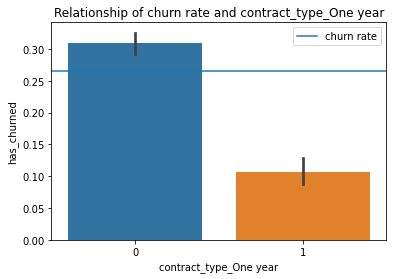

We reject the null hypothesis that contract_type_One year and churn rate are independent
There is a relationship between churn rate and contract_type_One year

contract_type_Two year
0    3230
1     995
Name: contract_type_Two year, dtype: int64
0    76.449704
1    23.550296
Name: contract_type_Two year, dtype: float64


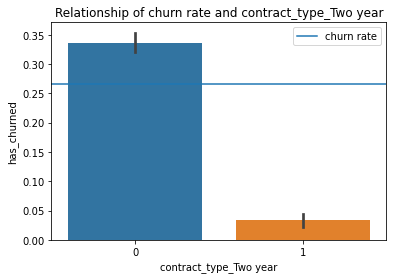

We reject the null hypothesis that contract_type_Two year and churn rate are independent
There is a relationship between churn rate and contract_type_Two year

internet_service_type_Fiber optic
0    2370
1    1855
Name: internet_service_type_Fiber optic, dtype: int64
0    56.094675
1    43.905325
Name: internet_service_type_Fiber optic, dtype: float64


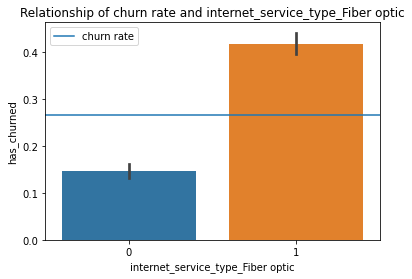

We reject the null hypothesis that internet_service_type_Fiber optic and churn rate are independent
There is a relationship between churn rate and internet_service_type_Fiber optic

internet_service_type_None
0    3302
1     923
Name: internet_service_type_None, dtype: int64
0    78.153846
1    21.846154
Name: internet_service_type_None, dtype: float64


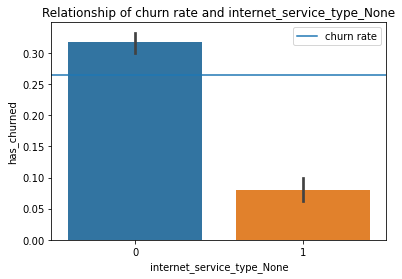

We reject the null hypothesis that internet_service_type_None and churn rate are independent
There is a relationship between churn rate and internet_service_type_None

payment_type_Credit card (automatic)
0    3306
1     919
Name: payment_type_Credit card (automatic), dtype: int64
0    78.248521
1    21.751479
Name: payment_type_Credit card (automatic), dtype: float64


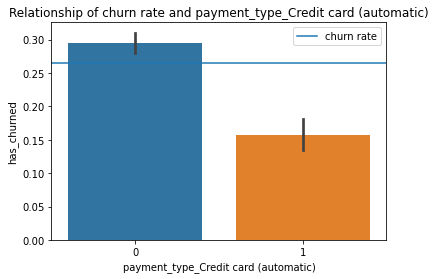

We reject the null hypothesis that payment_type_Credit card (automatic) and churn rate are independent
There is a relationship between churn rate and payment_type_Credit card (automatic)

payment_type_Electronic check
0    2802
1    1423
Name: payment_type_Electronic check, dtype: int64
0    66.319527
1    33.680473
Name: payment_type_Electronic check, dtype: float64


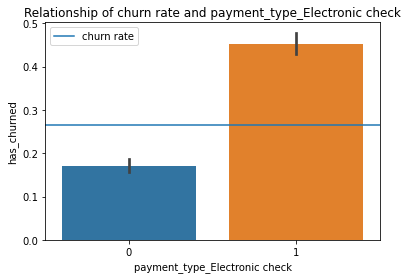

We reject the null hypothesis that payment_type_Electronic check and churn rate are independent
There is a relationship between churn rate and payment_type_Electronic check

payment_type_Mailed check
0    3275
1     950
Name: payment_type_Mailed check, dtype: int64
0    77.514793
1    22.485207
Name: payment_type_Mailed check, dtype: float64


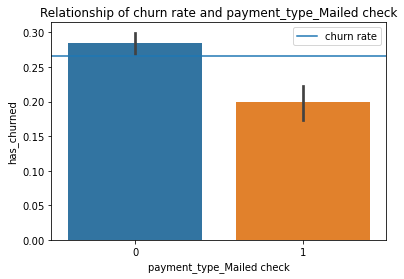

We reject the null hypothesis that payment_type_Mailed check and churn rate are independent
There is a relationship between churn rate and payment_type_Mailed check



In [9]:
# exploring each categorical feature to get a better understanding of what each column looks like count wise
# created visualizations for each feature and chi square hypothesis testing to each feature to determine its 
# relationship to the churn rate.
for col in cat_type_list:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    explore.telco_analysis(train, col)
    print()

### There is no relatioship between churn rate and that of gender or whether a customer has phone service or not.  Customer id has zero dependency on churn rate but I will keep it in for the sake of the project and identifying final predictions. 

# Further Exploration

## How does monthly charges and tenure relate in terms of churn rate?

<AxesSubplot:xlabel='monthly_charges', ylabel='tenure'>

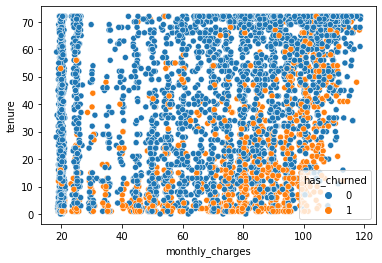

In [10]:
# Created a scatterplot to show relationships between monthly charges, a customer's tenure, and when they will 
# possibly churn
sns.scatterplot(x = 'monthly_charges', y='tenure', hue= 'has_churned', data = train)

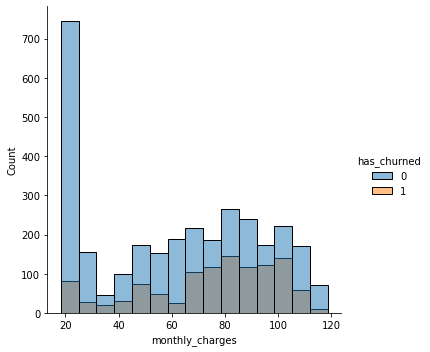

In [11]:
# Created a distribution plot to show a different visualization of how monthly charges relates to churn rate
sns.displot(x='monthly_charges', hue="has_churned", data = train)

<AxesSubplot:xlabel='internet_service_type_None', ylabel='monthly_charges'>

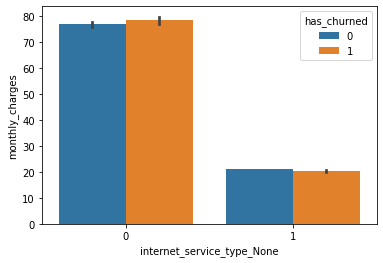

In [12]:
# Created a barplot to see if having internet services has a big influence on monthly charges and in turn churn
# rate
sns.barplot(x='internet_service_type_None', y='monthly_charges', hue='has_churned', data = train)

### The higher the monthly charge the more likely the customer will churn thus leading to a low tenure value.   It seems that internet service type plays a role in increased monthly charges as well.

## Do older customers without tech support churn more often than those with?

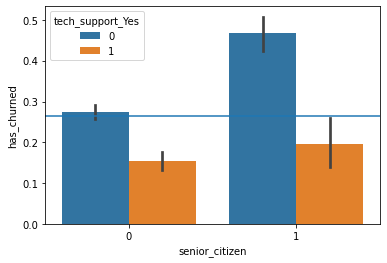

In [13]:
# Created a barplot to see relationship between older customers and those who don't have technical support
sns.barplot(x='senior_citizen', y='has_churned', hue= 'tech_support_Yes', data=train)
churn_rate = train.has_churned.mean()
plt.axhline(churn_rate, label='churn rate')

### Senior citizens without tech support are more prone to churn than those who do have tech support.  The same thing holds true for younger customers as well.

# Setting Up Baseline Accuracy and Modeling

In [15]:
# Create an 'X' variable that groups all features to be used within my models for my train, validate, and test
# dataset and a 'y' variable that is a series with just my target variable 'has_churned' within it
X_train = train.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id', 'multiple_lines_Yes', 'online_backup_Yes', 'device_protection_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']))
y_train = train.has_churned
X_validate = validate.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id', 'multiple_lines_Yes', 'online_backup_Yes', 'device_protection_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']))
y_validate = validate.has_churned
X_test = test.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id','multiple_lines_Yes', 'online_backup_Yes', 'device_protection_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']))
y_test = test.has_churned

In [16]:
# Setting up my baseline accuracy.  Models must have a better accuracy than this established baseline.
print(f'The baseline accuracy for nonchurned customers in all cases within the telco dataset is {(y_train == 0).mean():.2}')

The baseline accuracy for nonchurned customers in all cases within the telco dataset is 0.73


## Decision Tree Model creation

In [21]:
# Creating multiple Decision Tree models utilizing the above chosen features.  Created a for loop that allows me
# to look at multiple max depths at once for the train dataset.
for i in range (5, 16, 5):
    clf = DecisionTreeClassifier(max_depth= i, random_state=123)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))

Tree with max depth of 5
                     0            1  accuracy    macro avg  weighted avg
precision     0.847307     0.649948  0.802604     0.748627      0.794943
recall        0.892075     0.554862  0.802604     0.723468      0.802604
f1-score      0.869115     0.598653  0.802604     0.733884      0.797354
support    3104.000000  1121.000000  0.802604  4225.000000   4225.000000
Tree with max depth of 10
                     0            1  accuracy    macro avg  weighted avg
precision     0.906415     0.820641  0.886154     0.863528      0.883657
recall        0.942332     0.730598  0.886154     0.836465      0.886154
f1-score      0.924025     0.773006  0.886154     0.848515      0.883956
support    3104.000000  1121.000000  0.886154  4225.000000   4225.000000
Tree with max depth of 15
                     0            1  accuracy    macro avg  weighted avg
precision     0.966540     0.960265   0.96497     0.963403      0.964875
recall        0.986469     0.905442   0.96497  

In [23]:
# Created a for loop that allows me to look at multiple max depths at once for the validate dataset
for i in range (5, 16, 5):
    clf = DecisionTreeClassifier(max_depth= i, random_state=123)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validate)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

Tree with max depth of 5
                     0           1  accuracy    macro avg  weighted avg
precision     0.846512    0.625749   0.79418     0.736130      0.787913
recall        0.879227    0.558824   0.79418     0.719025      0.794180
f1-score      0.862559    0.590395   0.79418     0.726477      0.790317
support    1035.000000  374.000000   0.79418  1409.000000   1409.000000
Tree with max depth of 10
                     0           1  accuracy    macro avg  weighted avg
precision     0.833952    0.589124  0.776437     0.711538      0.768966
recall        0.868599    0.521390  0.776437     0.694995      0.776437
f1-score      0.850923    0.553191  0.776437     0.702057      0.771894
support    1035.000000  374.000000  0.776437  1409.000000   1409.000000
Tree with max depth of 15
                     0           1  accuracy    macro avg  weighted avg
precision     0.824260    0.524862  0.747339     0.674561      0.744789
recall        0.833816    0.508021  0.747339     0.670919  

In [25]:
# After finding the best model using decision tree methodology I compared the train set's accuracy score with the 
# validate set's accuracy score to determine the level of consistency between trained data and untrained data.
clf = DecisionTreeClassifier(max_depth=5, random_state=123)
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train) - clf.score(X_validate, y_validate)

0.008423280601038918

### After creating mulitple decision tree models I decided that a decision tree with a max depth of 5 was the better fit for this model type with a difference in .008 between the train accuracy and validate accuracy.

## Logistic Regression Model Creation

In [31]:
# Utilizing my established features within the X_train variable and my target with y_train, I created a logistic
# regression model to best predict churn rate.  
logit = LogisticRegression(random_state=123)
logit = logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print()
print(pd.DataFrame(classification_report(y_validate, logit.predict(X_validate), output_dict=True)))

                     0            1  accuracy    macro avg  weighted avg
precision     0.829876     0.642773  0.792189     0.736324      0.780233
recall        0.902062     0.487957  0.792189     0.695010      0.792189
f1-score      0.864464     0.554767  0.792189     0.709616      0.782294
support    3104.000000  1121.000000  0.792189  4225.000000   4225.000000

                     0           1  accuracy    macro avg  weighted avg
precision     0.836007    0.662021  0.800568     0.749014      0.789825
recall        0.906280    0.508021  0.800568     0.707151      0.800568
f1-score      0.869726    0.574887  0.800568     0.722307      0.791465
support    1035.000000  374.000000  0.800568  1409.000000   1409.000000


In [32]:
# Created a new model with a new C value of .1
logit = LogisticRegression(random_state=123, C=.1)
logit = logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print()
print(pd.DataFrame(classification_report(y_validate, logit.predict(X_validate), output_dict=True)))

                     0            1  accuracy    macro avg  weighted avg
precision     0.838748     0.649279  0.798343     0.744014      0.788477
recall        0.898196     0.521855  0.798343     0.710026      0.798343
f1-score      0.867455     0.578635  0.798343     0.723045      0.790824
support    3104.000000  1121.000000  0.798343  4225.000000   4225.000000

                     0           1  accuracy    macro avg  weighted avg
precision     0.840359    0.666667  0.804116     0.753513      0.794255
recall        0.905314    0.524064  0.804116     0.714689      0.804116
f1-score      0.871628    0.586826  0.804116     0.729227      0.796031
support    1035.000000  374.000000  0.804116  1409.000000   1409.000000


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Created a new model with a new C value of .8
logit = LogisticRegression(C=.8)
logit = logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print()
print(pd.DataFrame(classification_report(y_validate, logit.predict(X_validate), output_dict=True)))

                     0            1  accuracy    macro avg  weighted avg
precision     0.843352     0.649839   0.80071     0.746595      0.792008
recall        0.894974     0.539697   0.80071     0.717335      0.800710
f1-score      0.868396     0.589669   0.80071     0.729032      0.794443
support    3104.000000  1121.000000   0.80071  4225.000000   4225.000000

                     0           1  accuracy    macro avg  weighted avg
precision     0.846224    0.661290  0.805536     0.753757      0.797136
recall        0.898551    0.548128  0.805536     0.723340      0.805536
f1-score      0.871603    0.599415  0.805536     0.735509      0.799354
support    1035.000000  374.000000  0.805536  1409.000000   1409.000000


In [35]:
# After finding the best model using logitstic regression methodology I compared the train set's accuracy score 
# with the validate set's accuracy score to determine the level of consistency between trained data and untrained 
# data.
logit.score(X_validate, y_validate)-logit.score(X_train, y_train)

0.004825781850403721

### After creating multiple logistic regression models I decided that a model with a C value of .8 was the better fit for this model type with a difference in .005 between the train accuracy and validate accuracy.

## Random Forest Model Creation

In [36]:
# Creating multiple Random Forest models utilizing the same chosen features as previous models.  Created a for 
# loop that allows me to look at multiple max depths at once for the train dataset.
for i in range (5, 11):
    rf = RandomForestClassifier(max_depth= i, random_state=123)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))

Tree with max depth of 5
                     0            1  accuracy    macro avg  weighted avg
precision     0.826575     0.692513   0.80284     0.759544      0.791005
recall        0.925902     0.462087   0.80284     0.693995      0.802840
f1-score      0.873423     0.554307   0.80284     0.713865      0.788754
support    3104.000000  1121.000000   0.80284  4225.000000   4225.000000
Tree with max depth of 6
                     0            1  accuracy    macro avg  weighted avg
precision     0.837522     0.703611  0.812071     0.770567      0.801992
recall        0.923325     0.504014  0.812071     0.713670      0.812071
f1-score      0.878333     0.587318  0.812071     0.732825      0.801119
support    3104.000000  1121.000000  0.812071  4225.000000   4225.000000
Tree with max depth of 7
                     0            1  accuracy    macro avg  weighted avg
precision     0.849644     0.719812  0.823432     0.784728      0.815196
recall        0.923003     0.547725  0.823432    

In [37]:
# Created a for loop that allows me to look at multiple max depths at once for the validate dataset.
for i in range (5, 11):
    rf = RandomForestClassifier(max_depth= i, random_state=123)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_validate)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

Tree with max depth of 5
                     0           1  accuracy    macro avg  weighted avg
precision     0.826840    0.685039  0.801278     0.755940      0.789201
recall        0.922705    0.465241  0.801278     0.693973      0.801278
f1-score      0.872146    0.554140  0.801278     0.713143      0.787736
support    1035.000000  374.000000  0.801278  1409.000000   1409.000000
Tree with max depth of 6
                     0           1  accuracy    macro avg  weighted avg
precision     0.834951    0.677536  0.804116     0.756244      0.793168
recall        0.914010    0.500000  0.804116     0.707005      0.804116
f1-score      0.872694    0.575385  0.804116     0.724039      0.793777
support    1035.000000  374.000000  0.804116  1409.000000   1409.000000
Tree with max depth of 7
                     0           1  accuracy    macro avg  weighted avg
precision     0.836283    0.677419  0.804826     0.756851      0.794115
recall        0.913043    0.505348  0.804826     0.709196    

In [38]:
# After discovering that max depth of 5 was the best Random Forest model, I compared the train dataset's accuracy
# to that of the validate dataset's accuracy
rf = RandomForestClassifier(max_depth=5,random_state=123)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train) - rf.score(X_validate, y_validate)

0.0015627349120824752

### After creating multiple Random Forest models I decided that a model with a max depth of 5 was the better fit for this model type with a difference in .002 between the train accuracy and validate accuracy.

## KNN Model Creation

In [39]:
for i in range (10, 31, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    print(f'KNeighbors with n_neighbors of {i}')
    print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))

KNeighbors with n_neighbors of 10
                     0            1  accuracy    macro avg  weighted avg
precision     0.819827     0.747634  0.808994     0.783731      0.800673
recall        0.948454     0.422837  0.808994     0.685645      0.808994
f1-score      0.879462     0.540171  0.808994     0.709817      0.789440
support    3104.000000  1121.000000  0.808994  4225.000000   4225.000000
KNeighbors with n_neighbors of 15
                     0            1  accuracy    macro avg  weighted avg
precision     0.821875     0.700709  0.801657     0.761292      0.789727
recall        0.932023     0.440678  0.801657     0.686351      0.801657
f1-score      0.873490     0.541073  0.801657     0.707282      0.785292
support    3104.000000  1121.000000  0.801657  4225.000000   4225.000000
KNeighbors with n_neighbors of 20
                     0            1  accuracy    macro avg  weighted avg
precision     0.809906     0.710311  0.795503     0.760108      0.783481
recall        0.942977

In [40]:
for i in range (10, 31, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validate)
    print(f'KNeighbors with n_neighbors of {i}')
    print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

KNeighbors with n_neighbors of 10
                     0           1  accuracy    macro avg  weighted avg
precision     0.803497    0.663462  0.782825     0.733479      0.766327
recall        0.932367    0.368984  0.782825     0.650676      0.782825
f1-score      0.863148    0.474227  0.782825     0.668688      0.759914
support    1035.000000  374.000000  0.782825  1409.000000   1409.000000
KNeighbors with n_neighbors of 15
                     0           1  accuracy    macro avg  weighted avg
precision     0.808673    0.639485  0.780696     0.724079      0.763765
recall        0.918841    0.398396  0.780696     0.658618      0.780696
f1-score      0.860244    0.490939  0.780696     0.675592      0.762217
support    1035.000000  374.000000  0.780696  1409.000000   1409.000000
KNeighbors with n_neighbors of 20
                     0           1  accuracy    macro avg  weighted avg
precision     0.802805    0.685279  0.786373     0.744042      0.771610
recall        0.940097    0.360963

In [41]:
knn = KNeighborsClassifier(n_neighbors=25)
knn = knn.fit(X_train, y_train)
knn.score(X_train, y_train) - knn.score(X_validate, y_validate)

0.005107655351690887

### After creating multiple K-Nearest Neighbor models I decided that a model with a k of 25 was the better fit for this model type with a difference in .005 between the train accuracy and validate accuracy.

## MVP Model Creation Takeaways
- After creating multiple Decision Tree models (.008), Logistic Regression models (.005), Random Forest models (.002), and K-Nearest Neighbor models (.005) I discovered that the best model overall was that of the Random Forest.
- The Random Forest model provided an accuracy of 80% beating my baseline accuracy of 73% and having the most consistency in results between the train and validate dataset

# Testing Best Model (Random Forest Model max depth of 5)

In [42]:
# Testing my model against the test dataset
print(pd.DataFrame(classification_report(y_test, rf.predict(X_test), output_dict=True)))

                     0           1  accuracy    macro avg  weighted avg
precision     0.833480    0.675182  0.802697     0.754331      0.791462
recall        0.914010    0.494652  0.802697     0.704331      0.802697
f1-score      0.871889    0.570988  0.802697     0.721439      0.792019
support    1035.000000  374.000000  0.802697  1409.000000   1409.000000


## Predictions

In [43]:
# Estimating the probability of churn for each customer
proba_test = rf.predict_proba(X_test)

In [44]:
# creating a dataframe for easier visualization 
proba_df = pd.DataFrame(proba_test, columns = rf.classes_.tolist())
proba_df.head()

,0,1
0,0.820467,0.179533
1,0.957783,0.042217
2,0.502717,0.497283
3,0.576383,0.423617
4,0.341305,0.658695


In [48]:
# Creating a new index for each customer reminscent of customer ID
test_df = X_test.reset_index()
test_df.head()

,index,senior_citizen,tenure,monthly_charges,total_charges,has_partner,has_dependents,has_paperless_billing,online_security_Yes,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,3160,0,51,95.15,5000.05,1,1,1,1,1,1,0,1,0,0,0,1
1,1577,0,65,71.00,4386.20,1,0,0,1,0,0,1,0,0,0,0,0
2,6823,0,18,96.05,1740.70,0,0,1,1,0,0,0,1,0,0,1,0
3,3615,0,25,105.50,2686.05,0,0,1,1,1,0,0,1,0,0,1,0
4,882,1,4,88.85,372.45,0,0,1,0,0,0,0,1,0,0,1,0


In [49]:
# Merged the probability dataframe with test dataset that contains new index
predictions = pd.concat([test_df, proba_df], axis=1)
predictions.head()

,index,senior_citizen,tenure,monthly_charges,total_charges,has_partner,has_dependents,has_paperless_billing,online_security_Yes,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,0,1
0,3160,0,51,95.15,5000.05,1,1,1,1,1,1,0,1,0,0,0,1,0.820467,0.179533
1,1577,0,65,71.00,4386.20,1,0,0,1,0,0,1,0,0,0,0,0,0.957783,0.042217
2,6823,0,18,96.05,1740.70,0,0,1,1,0,0,0,1,0,0,1,0,0.502717,0.497283
3,3615,0,25,105.50,2686.05,0,0,1,1,1,0,0,1,0,0,1,0,0.576383,0.423617
4,882,1,4,88.85,372.45,0,0,1,0,0,0,0,1,0,0,1,0,0.341305,0.658695


In [50]:
# Created a new column to display the predicted churn via my best model (Random Forest model)
predictions['predicted'] = rf.predict(X_test)
predictions.head()

,index,senior_citizen,tenure,monthly_charges,total_charges,has_partner,has_dependents,has_paperless_billing,online_security_Yes,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,0,1,predicted
0,3160,0,51,95.15,5000.05,1,1,1,1,1,1,0,1,0,0,0,1,0.820467,0.179533,0
1,1577,0,65,71.00,4386.20,1,0,0,1,0,0,1,0,0,0,0,0,0.957783,0.042217,0
2,6823,0,18,96.05,1740.70,0,0,1,1,0,0,0,1,0,0,1,0,0.502717,0.497283,0
3,3615,0,25,105.50,2686.05,0,0,1,1,1,0,0,1,0,0,1,0,0.576383,0.423617,0
4,882,1,4,88.85,372.45,0,0,1,0,0,0,0,1,0,0,1,0,0.341305,0.658695,1


In [52]:
# Created new dataframe with condensed information/features for prediction csv file
csv_churn = predictions[['index', 0, 1, 'predicted']]
csv_churn.head()

,index,0,1,predicted
0,3160,0.820467,0.179533,0
1,1577,0.957783,0.042217,0
2,6823,0.502717,0.497283,0
3,3615,0.576383,0.423617,0
4,882,0.341305,0.658695,1


In [53]:
# Saved my csv file to my directory
csv_churn.to_csv('predictions.csv')

# Conclusions and Recommendations

1. Utilizing the following features outlined in X_train, X_validate, and X_test I was able to narrow down my best model for predicting churn at Telco using a random forest model with a max depth of 5 and an 80% accuracy rate.

2. Many features help to predict churn with some of the bigger predictors being age (senior_citizen), how much a customer is paying (monthly_charges, total_charges, contract_type, payment_type) and what's affecting how much they pay (internet_service_type), and finally whether customers have adequate support with their plan (tech_support)

3. My recommendations are that customers are encouraged to sign up with a one or two year contract by maybe offering technical support included.  We should also focus on a younger crowd who has an established family because they tend to churn at a lesser rate.